In [2]:
    #                              Practical No:5
    # Title:Implement K-Means clustering/ hierarchical clustering on
    #         sales_data_sample.csv dataset. Determine the number of
    #         clusters using the elbow method.
    #         Dataset link :
    #         https://www.kaggle.com/datasets/kyanyoga/samplesales-data


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sales_data_sample.csv', encoding='ISO-8859-1')
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [3]:
df.shape

(2823, 25)

In [4]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

<Axes: xlabel='STATUS', ylabel='count'>

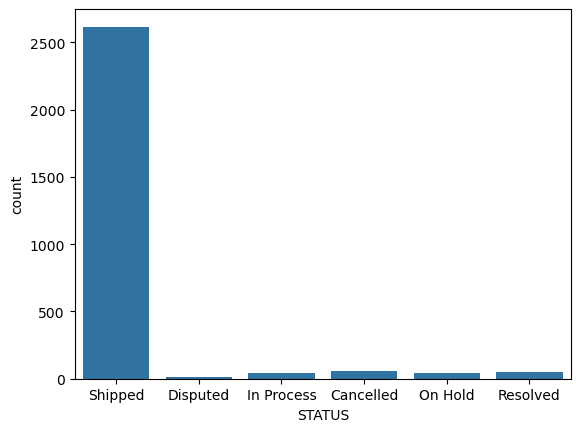

In [5]:
sns.countplot(data=df,x='STATUS')

<Axes: xlabel='SALES', ylabel='Count'>

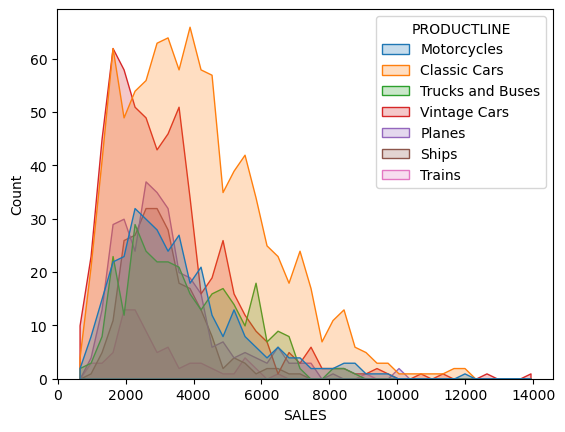

In [6]:
sns.histplot(x='SALES', hue='PRODUCTLINE', data=df, element="poly")

In [7]:
df['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [8]:
df.drop_duplicates(inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [9]:
list_cat=df.select_dtypes(include=['object']).columns.tolist()
list_cat


['ORDERDATE',
 'STATUS',
 'PRODUCTLINE',
 'PRODUCTCODE',
 'CUSTOMERNAME',
 'PHONE',
 'ADDRESSLINE1',
 'ADDRESSLINE2',
 'CITY',
 'STATE',
 'POSTALCODE',
 'COUNTRY',
 'TERRITORY',
 'CONTACTLASTNAME',
 'CONTACTFIRSTNAME',
 'DEALSIZE']

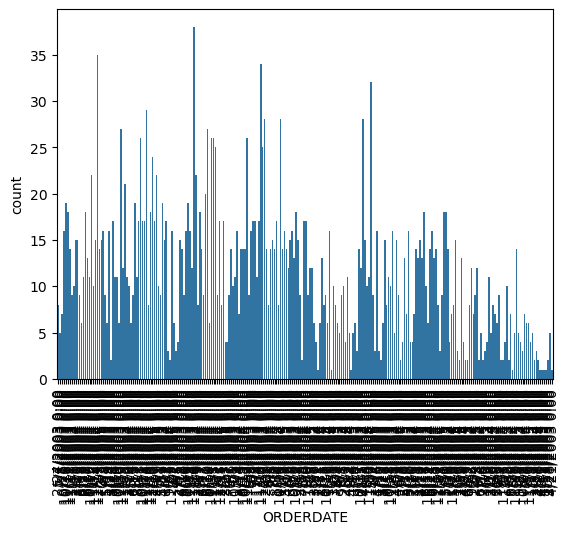

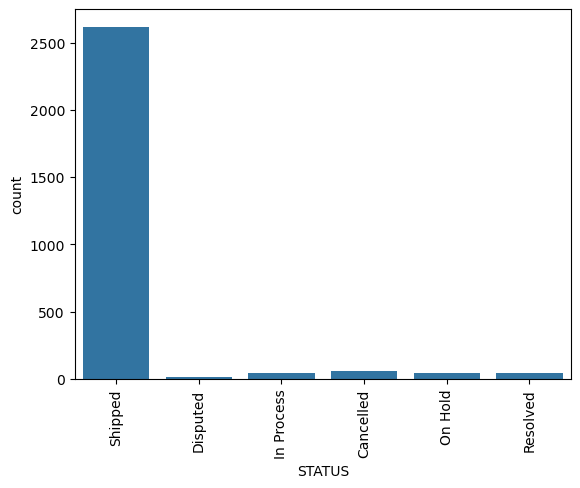

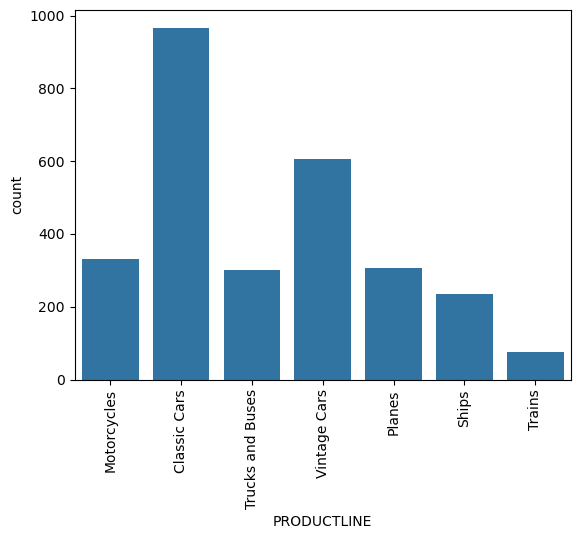

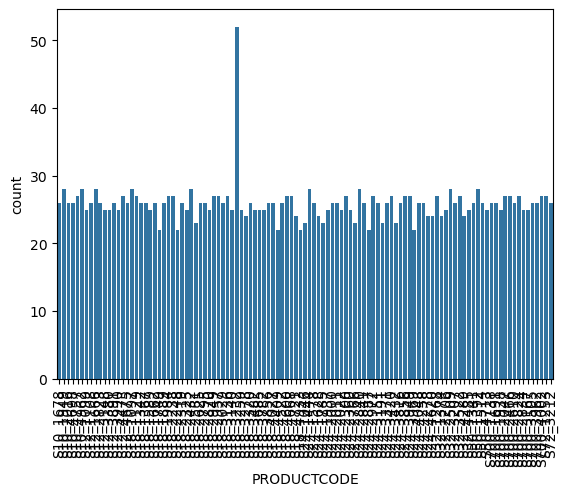

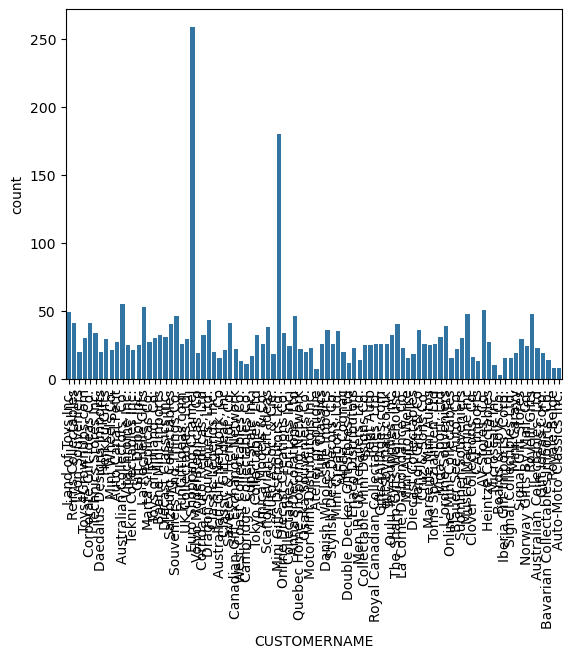

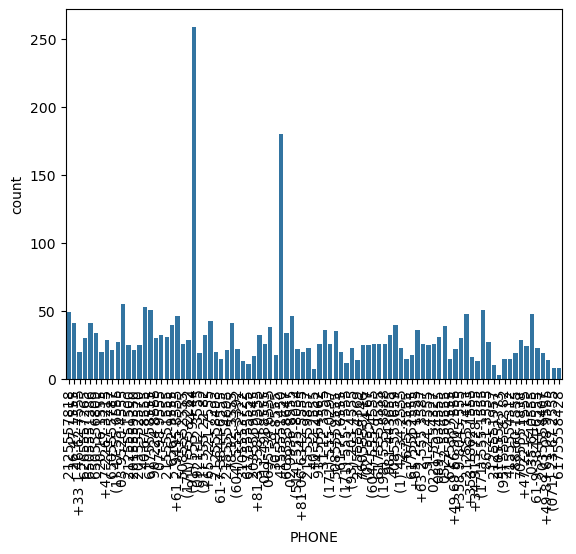

C:\Users\raksh\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 132 (\x84) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


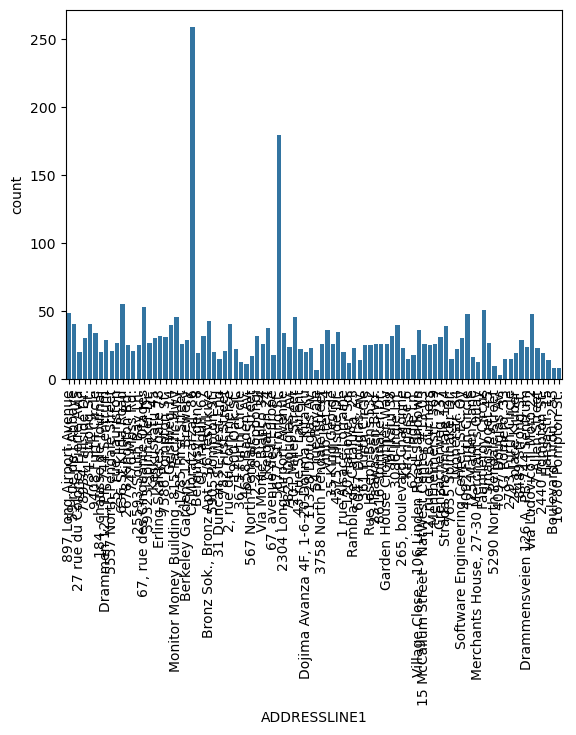

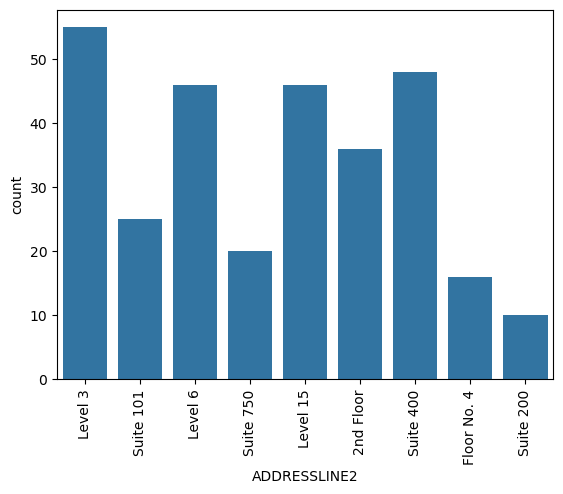

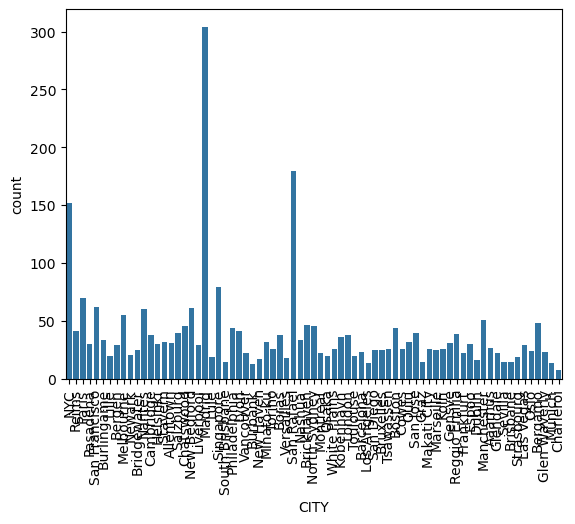

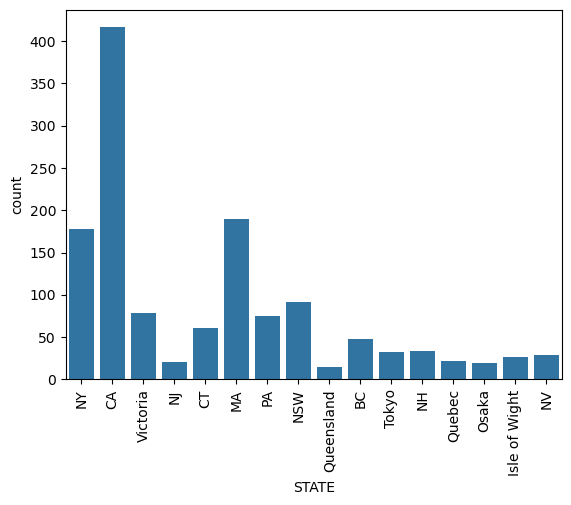

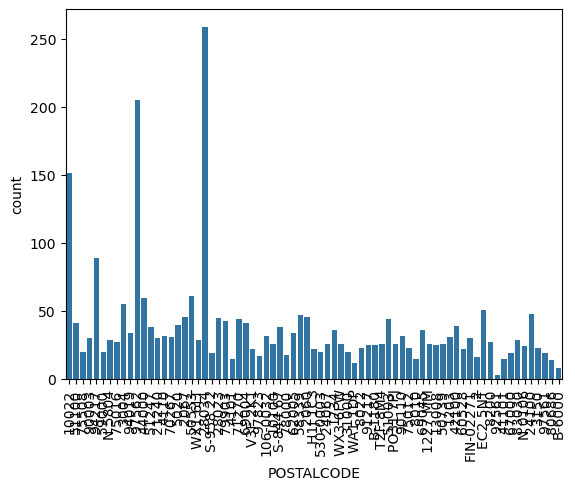

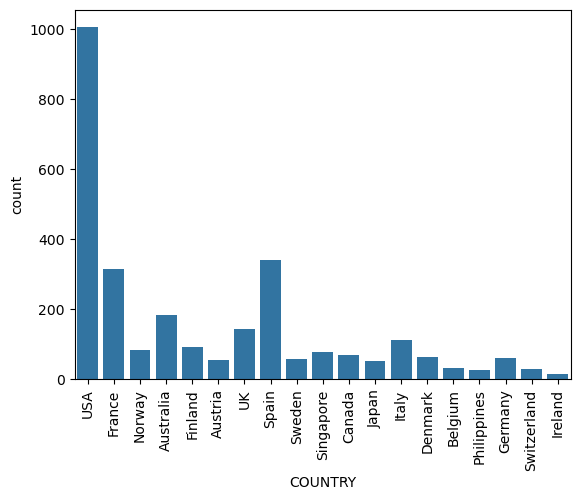

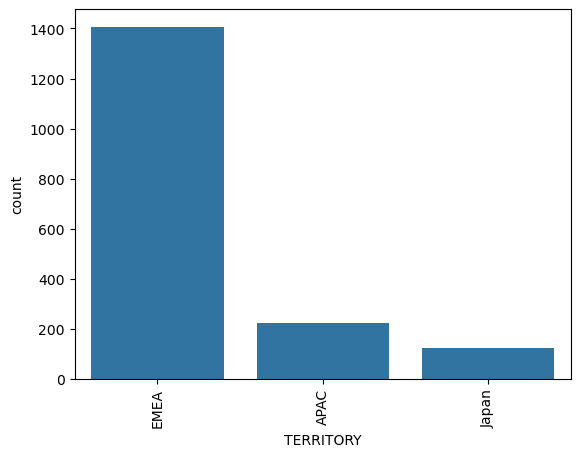

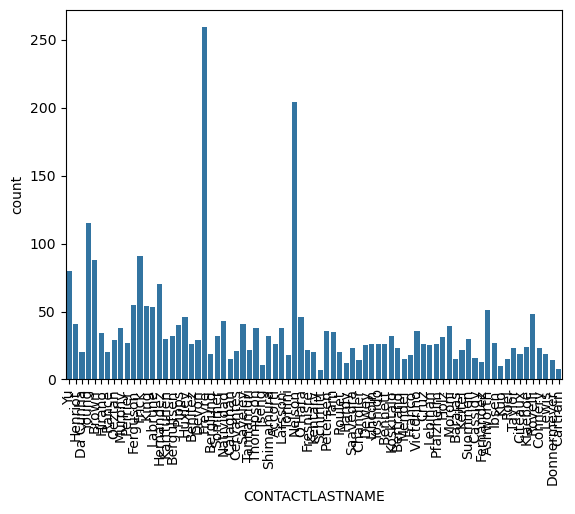

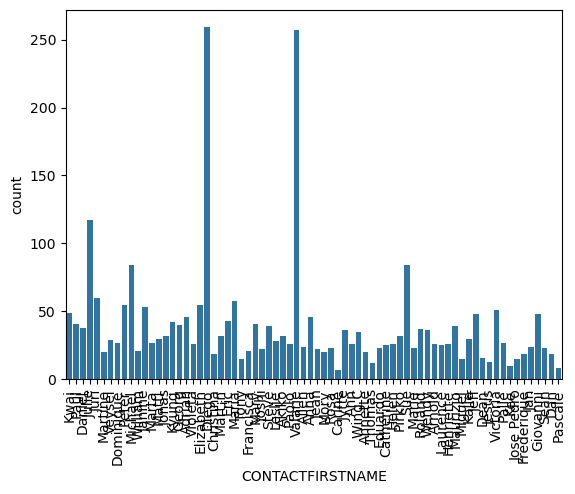

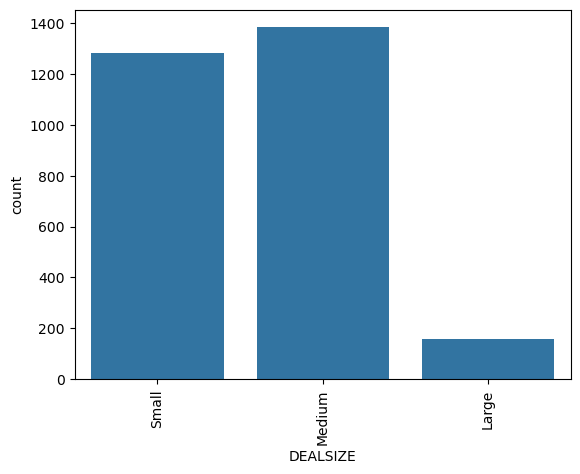

In [10]:
for i in list_cat:
    sns.countplot(data=df,x=i)
    plt.xticks(rotation=90)
    plt.show()


In [11]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

for i in list_cat:
    df[i]=le.fit_transform(df[i])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   int32  
 6   STATUS            2823 non-null   int32  
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   int32  
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   int32  
 13  CUSTOMERNAME      2823 non-null   int32  
 14  PHONE             2823 non-null   int32  
 15  ADDRESSLINE1      2823 non-null   int32  
 16  ADDRESSLINE2      2823 non-null   int32  


In [12]:
df['SALES']=df['SALES'].astype(int)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   int32  
 5   ORDERDATE         2823 non-null   int32  
 6   STATUS            2823 non-null   int32  
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   int32  
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   int32  
 13  CUSTOMERNAME      2823 non-null   int32  
 14  PHONE             2823 non-null   int32  
 15  ADDRESSLINE1      2823 non-null   int32  
 16  ADDRESSLINE2      2823 non-null   int32  


In [13]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,...,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.421537,116.949345,4.782501,2.717676,7.092455,2003.81509,...,48.956784,8.440312,38.094226,10.991144,33.423309,12.029401,1.725469,39.462983,36.552958,1.398512
std,92.085478,9.741443,20.174277,4.225841,1841.865754,73.108081,0.879416,1.203878,3.656633,0.69967,...,25.358148,1.799844,19.446076,6.137590,22.051492,6.169774,1.056893,21.511060,21.018468,0.592498
min,10100.000000,6.000000,26.880000,1.000000,482.000000,0.000000,0.000000,1.000000,1.000000,2003.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.000000,53.000000,5.000000,2.000000,4.000000,2003.00000,...,29.000000,9.000000,24.500000,4.000000,14.000000,6.000000,1.000000,25.000000,16.000000,1.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.000000,102.000000,5.000000,3.000000,8.000000,2004.00000,...,51.000000,9.000000,38.000000,16.000000,30.000000,14.000000,1.000000,39.000000,36.000000,1.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,182.000000,5.000000,4.000000,11.000000,2004.00000,...,68.000000,9.000000,55.000000,16.000000,54.000000,18.000000,3.000000,56.000000,57.000000,2.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.000000,251.000000,5.000000,4.000000,12.000000,2005.00000,...,91.000000,9.000000,72.000000,16.000000,73.000000,18.000000,3.000000,76.000000,71.000000,2.000000


In [14]:
x=df[['SALES','PRODUCTCODE']]
df.columns


Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

In [15]:

pip install yellowbrick


Note: you may need to restart the kernel to use updated packages.


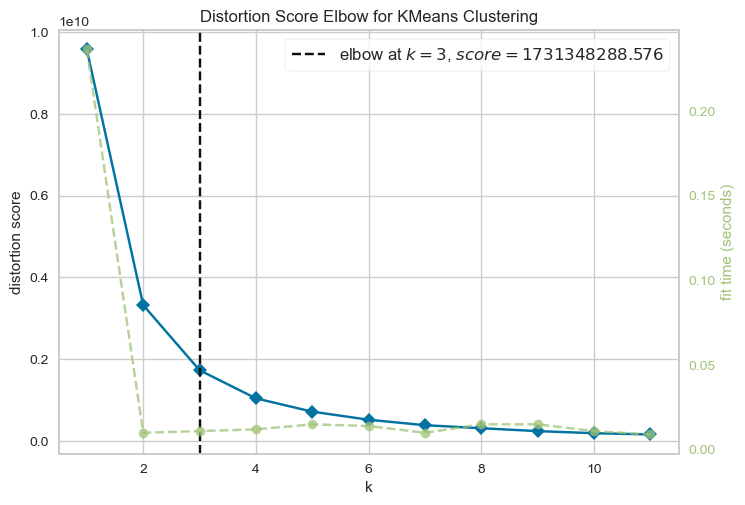

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
from sklearn.cluster import KMeans
km=KMeans(1)

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer=KElbowVisualizer(model, k=(1,12)).fit(x)
visualizer.show()


In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
kmeans.fit(x)


KMeans(n_clusters=4, random_state=0)

In [19]:
kmeans.labels_

array([2, 2, 2, ..., 3, 0, 2])

In [20]:
kmeans.inertia_

1043164092.8545703

In [21]:
kmeans.cluster_centers_

array([[1913.93425926,   63.19907407],
       [8023.78238342,   28.35751295],
       [3489.45517241,   55.50640394],
       [5371.72523364,   40.62616822]])

In [22]:
from collections import Counter
Counter(kmeans.labels_)


Counter({0: 1078, 2: 1015, 3: 537, 1: 193})